In [7]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [11]:
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [12]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
469/469 [==============================] - 27s 58ms/step - loss: 0.6915 - val_loss: 0.6903
Epoch 2/50
469/469 [==============================] - 30s 63ms/step - loss: 0.6886 - val_loss: 0.6867
Epoch 3/50
469/469 [==============================] - 30s 64ms/step - loss: 0.6838 - val_loss: 0.6803
Epoch 4/50
469/469 [==============================] - 28s 59ms/step - loss: 0.6743 - val_loss: 0.6665
Epoch 5/50
469/469 [==============================] - 29s 63ms/step - loss: 0.6506 - val_loss: 0.6281
Epoch 6/50
469/469 [==============================] - 27s 57ms/step - loss: 0.5805 - val_loss: 0.5259
Epoch 7/50
469/469 [==============================] - 27s 58ms/step - loss: 0.4967 - val_loss: 0.4881
Epoch 8/50
469/469 [==============================] - 30s 64ms/step - loss: 0.4802 - val_loss: 0.4798
Epoch 9/50
469/469 [==============================] - 28s 60ms/step - loss: 0.4727 - val_loss: 0.4729
Epoch 10/50
469/469 [==============================] - 28s 60ms/step - loss: 0.466

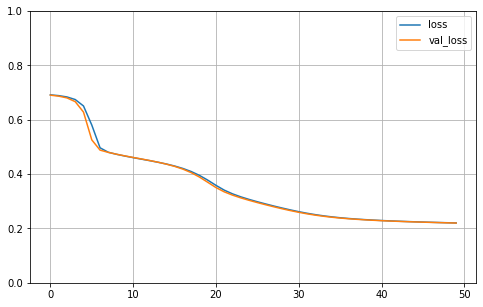

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))


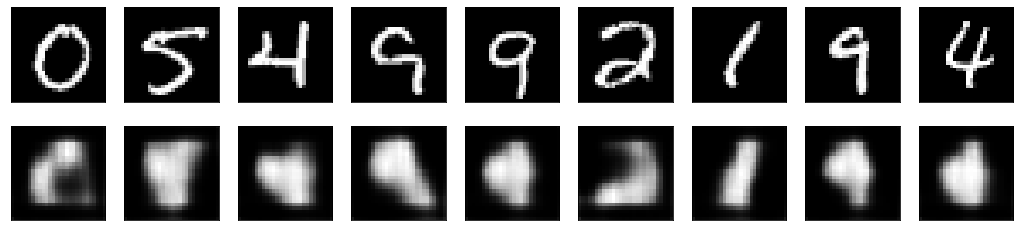

In [29]:
decoded_imgs = autoencoder.predict(x_test)
encoded_imgs = encoder.predict(x_test)

n = 10
offset = 100
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i+offset].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i+offset].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

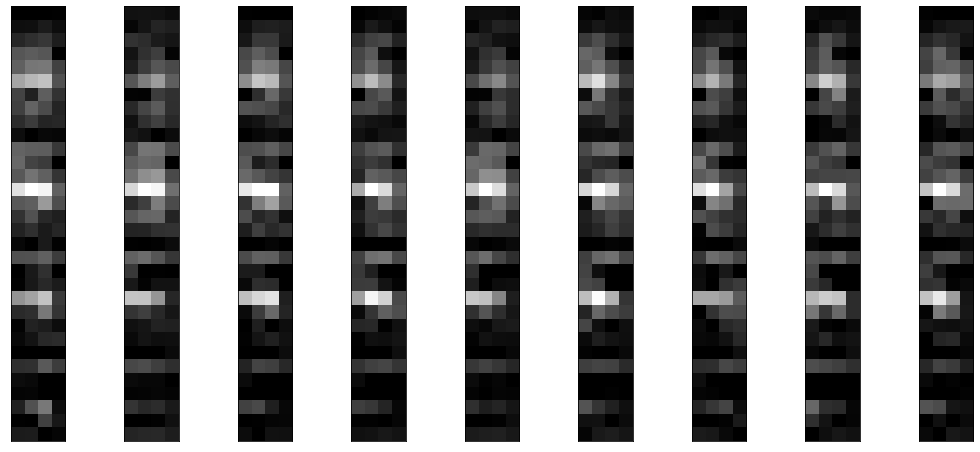

In [30]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()